In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

# os.chdir("/home/skystone/Documents/TimeSeries")
df = pd.read_csv('T1.csv', delimiter=',')

In [2]:
dataset = df[['Date/Time','Wind Speed (m/s)']]
dataset = dataset.rename(columns = {"Date/Time" :"timeStamp","Wind Speed (m/s)":"windSpeed"})
dataset = dataset[0:5000]

In [3]:
dataset.index = pd.to_datetime(dataset.timeStamp)
dataset = dataset.drop('timeStamp', axis=1)

dataset = dataset.sort_index()
dataset.fillna(df.mean(numeric_only=True))

,windSpeed
timeStamp,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941
...,...
2018-12-01 23:10:00,5.901831
2018-12-01 23:20:00,6.314789
2018-12-01 23:30:00,6.212303


In [38]:
# Testing whether there are null values
print(dataset[dataset.isnull()])
print(len(dataset[dataset.isnull()]))
dataset = dataset.sort_index()
print(dataset.index)

                     windSpeed  Ticks  Roll_Mean
timeStamp                                       
2018-01-01 00:00:00        NaN    NaN        NaN
2018-01-01 00:10:00        NaN    NaN        NaN
2018-01-01 00:20:00        NaN    NaN        NaN
2018-01-01 00:30:00        NaN    NaN        NaN
2018-01-01 00:40:00        NaN    NaN        NaN
...                        ...    ...        ...
2018-12-01 23:10:00        NaN    NaN        NaN
2018-12-01 23:20:00        NaN    NaN        NaN
2018-12-01 23:30:00        NaN    NaN        NaN
2018-12-01 23:40:00        NaN    NaN        NaN
2018-12-01 23:50:00        NaN    NaN        NaN

[5000 rows x 3 columns]
5000
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
         

In [39]:
# Replacing NaN values with the previous effective data
dataset.windSpeed.fillna(method='pad', inplace=True)
dataset[dataset.windSpeed.isnull()]

dataset.describe()

,windSpeed,Ticks,Roll_Mean
count,5000.000000,5000.000000,4989.000000
mean,9.476864,2499.500000,9.485092
std,5.038876,1443.520003,4.872598
min,0.000000,0.000000,0.712026
25%,5.767437,1249.750000,5.944990
50%,8.977808,2499.500000,9.058371
75%,12.692423,3749.250000,12.636875
max,25.206011,4999.000000,23.450228


In [40]:
dataset

,windSpeed,Ticks,Roll_Mean
timeStamp,,,
2018-01-01 00:00:00,5.311336,0,NaN
2018-01-01 00:10:00,5.672167,1,NaN
2018-01-01 00:20:00,5.216037,2,NaN
2018-01-01 00:30:00,5.659674,3,NaN
2018-01-01 00:40:00,5.577941,4,NaN
...,...,...,...
2018-12-01 23:10:00,5.901831,4995,5.455411
2018-12-01 23:20:00,6.314789,4996,5.550649
2018-12-01 23:30:00,6.212303,4997,5.645635


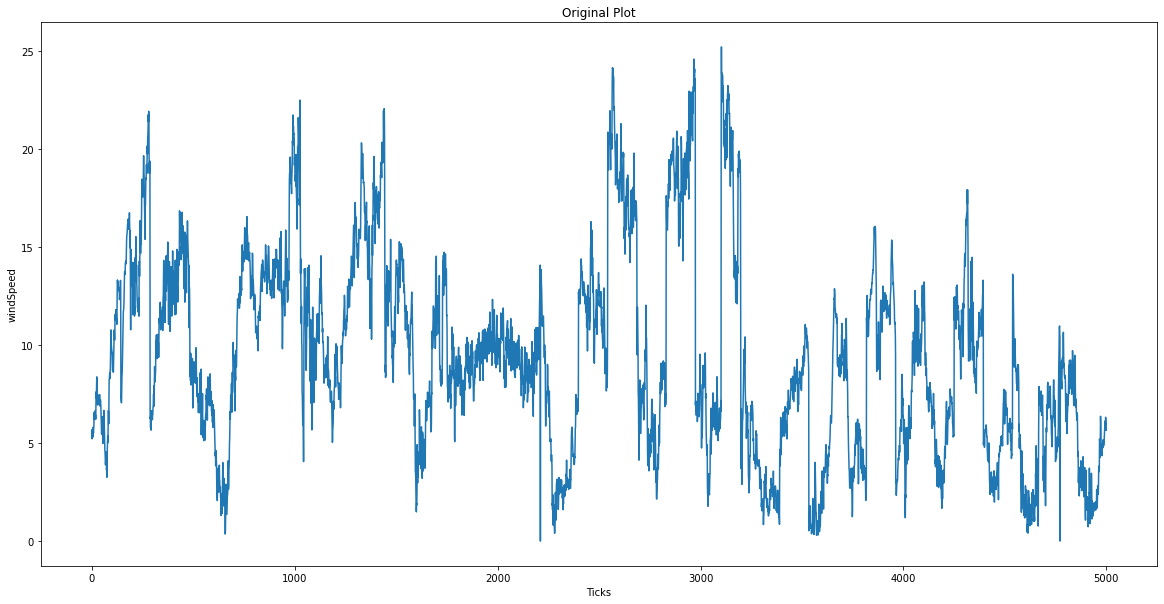

In [46]:
dataset['Ticks'] = range(0,len(dataset.index.values))

# very simple plotting
fig = plt.figure(1,figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('windSpeed')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'windSpeed', data = dataset);

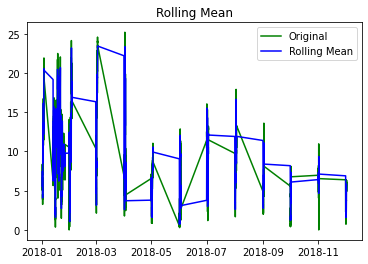

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-6.144307250627128, 7.83428392403748e-08, 4, 4995, {'1%': -3.43165984259144, '5%': -2.8621188086591505, '10%': -2.5670781005730454}, 14219.983885584175)
df_output: 
 Test Statistic                -6.144307e+00
p-value                        7.834284e-08
#Lags Used                     4.000000e+00
Number of Observations Used    4.995000e+03
dtype: float64
Test Statistic                -6.144307e+00
p-value                        7.834284e-08
#Lags Used                     4.000000e+00
Number of Observations Used    4.995000e+03
Critical Value (1%)           -3.431660e+00
Critical Value (5%)           -2.862119e+00
Critical Value (10%)          -2.567078e+00
dtype: float64


In [47]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):    
    # Determing rolling statistics
    #roll_mean = pd.rolling_mean(ts, window=12)
    roll_mean = ts.rolling(12).mean()
    
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)
    
stationarity_check(dataset.windSpeed)


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


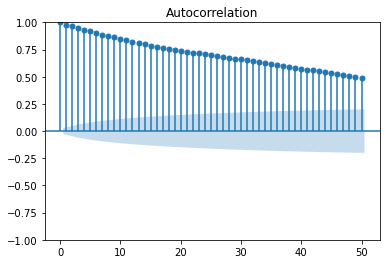

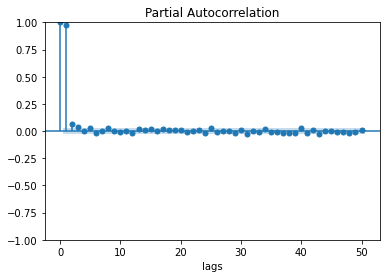

In [23]:
dataset['Roll_Mean'] = dataset.windSpeed.rolling(12).mean()
dataset.windSpeed.rolling(12)

from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(dataset.windSpeed, lags=50)
plot_pacf(dataset.windSpeed, lags=50)
plt.xlabel('lags')
plt.show()

In [59]:
import statsmodels.api as sm

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)

for param in pq:
    try:
        mod = sm.tsa.arima.ARIMA(dataset.windSpeed, order=(param[0], 0,  param[1]))
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue 
    
model = sm.tsa.arima.ARIMA(dataset.windSpeed, order=(1,0,2))  
results_MA = model.fit()  

# print(dataset.windSpeed)


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 0) - AIC:30364.214754078992


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 1) - AIC:24801.85610654526


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 2) - AIC:21549.84289810216


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 3) - AIC:19423.91977714306


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 0) - AIC:14317.335357631724


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 1) - AIC:14294.567837275692


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 2) - AIC:14291.390456605692


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 3) - AIC:14293.386433614156


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2, 0) - AIC:14296.277652768182


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2, 1) - AIC:14291.136570649745


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2, 2) - AIC:14293.397154198325


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2, 3) - AIC:14293.218648003909


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(3, 0) - AIC:14291.852610201244


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(3, 1) - AIC:14293.214932804232


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARMA(3, 2) - AIC:14292.411856384755


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(3, 3) - AIC:14293.965036045422


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


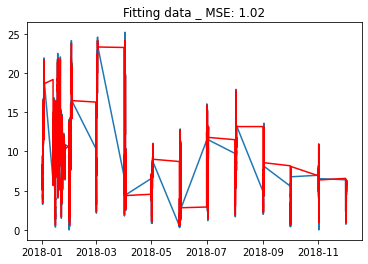

In [60]:
plt.plot(dataset.windSpeed)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-dataset.windSpeed)**2).mean()))
plt.show()

<AxesSubplot:xlabel='timeStamp'>

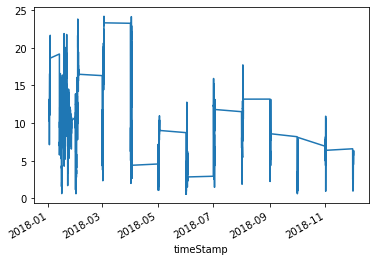

In [70]:
predictions = results_MA.predict('2018-01-01 18:50:00')
predictions
predictions.plot()

In [67]:
import joblib
joblib.dump(results_MA, 'humidityModel.pkl') 

['humidityModel.pkl']